- model comparison between the sigmoid and linear fits for mean subject-level playfight curves

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from func_fix_curvefit_params import *

In [2]:
root_folder = '../data/subtlety_data/'

In [3]:
df_linear = pd.read_csv(f'{root_folder}/curve_fit_subt_ses1_linear/all_params_1k_subt_linear.csv')#merged_apr_ses1.csv')#('../data/ses1_data/curve_fit_rmse/all_params_1k.csv')
bad_rows = (np.isnan(df_linear['obj_center'])) | \
      (np.isinf(df_linear['obj_center'])) | \
    (df_linear['obj_center']<0)
df_linear.loc[bad_rows,:]

,subID,r_squared,nrmse,aic,obj_center,slope,intercept,bias_xmin,bias_xmax,bias_lower,bias_upper,flipped
13,15.0,0.921869,0.093821,-46.867506,-0.068306,0.272321,0.518601,0.518601,0.209077,0.0,0.0,False
39,43.0,0.883578,0.108131,-41.973244,-0.215783,0.309805,0.566851,0.566851,0.123344,0.0,0.0,False
88,100.0,0.914497,0.108565,-43.695997,-0.061435,0.325195,0.519978,0.519978,0.154827,0.0,0.0,False
117,132.0,0.936976,0.101547,-45.151839,-0.009216,0.345536,0.503185,0.503185,0.151280,0.0,0.0,False
124,139.0,0.811277,0.180779,-39.590107,-0.048234,0.276429,0.513333,0.513333,0.210238,0.0,0.0,False
129,146.0,0.901613,0.126141,-40.157126,-0.048356,0.387581,0.518742,0.518742,0.093677,0.0,0.0,False
137,154.0,0.854004,0.152564,-32.380924,-0.035628,0.539643,0.519226,0.519226,-0.058869,0.0,0.0,False
139,156.0,0.868342,0.147199,-35.391554,-0.185729,0.462143,0.585833,0.585833,-0.047976,0.0,0.0,False
150,170.0,0.586211,0.237301,-25.070353,-0.235275,0.447679,0.605327,0.605327,-0.053006,0.0,0.0,False
151,171.0,0.840690,0.145661,-32.328965,-0.045013,0.514464,0.523157,0.523157,-0.037622,0.0,0.0,False


In [4]:
df_linear = fix_obj_center(df_linear)
bad_rows = (np.isnan(df_linear['obj_center'])) | \
      (np.isinf(df_linear['obj_center'])) | \
    (df_linear['obj_center']<0)
df_linear.loc[bad_rows,:]

,subID,r_squared,nrmse,aic,obj_center,slope,intercept,bias_xmin,bias_xmax,bias_lower,bias_upper,flipped


In [5]:
df_sigmoid = pd.read_csv(f'{root_folder}/curve_fit_subt_ses1/all_params_1k_subt.csv')#('../data/ses1_data/curve_fit_rmse/all_params_1k.csv')
bad_rows = (np.isnan(df_sigmoid['obj_center'])) | \
      (np.isinf(df_sigmoid['obj_center'])) | \
    (df_sigmoid['obj_center']<0)
df_sigmoid.loc[bad_rows,:]

,subID,r_squared,nrmse,aic,center,obj_center,sigma,bias_xmin,bias_xmax,bias_lower,bias_upper,flipped
13,15.0,0.907114,0.103089,-27.810296,0.534505,NaN,0.201028,0.543434,0.218639,0.525000,0.193333,False
39,43.0,0.874909,0.113754,-26.431992,0.408599,NaN,0.221992,0.579153,0.144244,0.531667,0.121667,False
88,100.0,0.981739,0.053964,-36.872079,0.423466,NaN,0.127252,0.526937,0.181588,0.516364,0.178333,False
117,132.0,0.988484,0.044332,-39.624762,0.470592,NaN,0.108652,0.527985,0.183901,0.524167,0.181667,False
124,139.0,0.990811,0.040039,-41.050748,0.375244,NaN,0.059265,0.503770,0.250840,0.503333,0.250833,False
129,146.0,0.979431,0.057878,-35.891859,0.525861,NaN,0.084023,0.553146,0.110361,0.552500,0.109167,False
137,154.0,0.984955,0.049049,-38.209221,0.388454,-0.054971,0.084176,0.502281,0.015341,0.497500,0.015000,False
139,156.0,0.993094,0.034272,-43.228128,0.357062,NaN,0.075175,0.569330,0.026745,0.565833,0.026667,False
173,193.0,0.940653,0.088831,-29.894283,0.447231,NaN,0.159722,0.657455,0.209443,0.649091,0.205000,False
207,229.0,0.989475,0.043020,-40.045226,0.338155,NaN,0.109512,0.580672,0.021820,0.562500,0.020833,False


In [6]:
df_sigmoid = fix_obj_center(df_sigmoid)
bad_rows = (np.isnan(df_sigmoid['obj_center'])) | \
      (np.isinf(df_sigmoid['obj_center'])) | \
    (df_sigmoid['obj_center']<0)
df_sigmoid.loc[bad_rows,:]

,subID,r_squared,nrmse,aic,center,obj_center,sigma,bias_xmin,bias_xmax,bias_lower,bias_upper,flipped


In [7]:
df_linear = add_new_params(df_linear)
df_linear.loc[df_linear['range']<0,:]

,subID,r_squared,nrmse,aic,obj_center,slope,intercept,bias_xmin,bias_xmax,bias_lower,bias_upper,flipped,range,bias


In [8]:
df_linear = df_linear.loc[df_linear['range']>0,:] # remove negative amplitudes
df_linear.loc[df_linear['range']<0,:]

,subID,r_squared,nrmse,aic,obj_center,slope,intercept,bias_xmin,bias_xmax,bias_lower,bias_upper,flipped,range,bias


In [9]:
bad_rows = (np.isnan(df_linear['obj_center'])) | \
      (np.isinf(df_linear['obj_center'])) | \
    (df_linear['obj_center']<0)
df_linear.loc[bad_rows,:]

,subID,r_squared,nrmse,aic,obj_center,slope,intercept,bias_xmin,bias_xmax,bias_lower,bias_upper,flipped,range,bias


In [10]:
df_sigmoid = add_new_params(df_sigmoid)
df_sigmoid.loc[df_sigmoid['range']<0,:]

,subID,r_squared,nrmse,aic,center,obj_center,sigma,bias_xmin,bias_xmax,bias_lower,bias_upper,flipped,range,bias


In [11]:
df_sigmoid = df_sigmoid.loc[df_sigmoid['range']>0,:] # remove negative amplitudes
df_sigmoid.loc[df_sigmoid['range']<0,:]

,subID,r_squared,nrmse,aic,center,obj_center,sigma,bias_xmin,bias_xmax,bias_lower,bias_upper,flipped,range,bias


In [12]:
bad_rows = (np.isnan(df_sigmoid['obj_center'])) | \
      (np.isinf(df_sigmoid['obj_center'])) | \
    (df_sigmoid['obj_center']<0)
df_sigmoid.loc[bad_rows,:]

,subID,r_squared,nrmse,aic,center,obj_center,sigma,bias_xmin,bias_xmax,bias_lower,bias_upper,flipped,range,bias


In [13]:
df_linear.rename({'obj_center':'PSE'},inplace=True)
df_linear.drop(columns=['bias_lower', 'bias_upper'],inplace=True)
df_linear.head()

,subID,r_squared,nrmse,aic,obj_center,slope,intercept,bias_xmin,bias_xmax,flipped,range,bias
0,1.0,0.891860,0.132104,-27.360645,0.329439,0.917143,0.197857,0.197857,0.000000,False,0.802143,1.000000
1,2.0,0.919039,0.113882,-27.444822,0.384286,1.000000,0.115714,0.115714,0.000000,False,0.884286,1.000000
2,3.0,0.954968,0.080484,-39.165829,0.398044,0.632857,0.248095,0.248095,0.119048,False,0.632857,0.675746
3,4.0,0.902167,0.119443,-33.970851,0.256520,0.604821,0.344851,0.344851,0.050327,False,0.604821,0.872646
4,5.0,0.915023,0.118506,-28.866852,0.445857,0.941071,0.080417,0.080417,0.000000,False,0.919583,1.000000


In [14]:
df_sigmoid.rename({'obj_center':'PSE'},inplace=True)
df_sigmoid.drop(columns=['bias_lower', 'bias_upper'],inplace=True)
df_sigmoid

,subID,r_squared,nrmse,aic,center,obj_center,sigma,bias_xmin,bias_xmax,flipped,range,bias
0,1.0,0.998083,0.018623,-51.767137,0.354384,0.326204,0.091967,0.175069,0.036553,False,0.788378,0.827272
1,2.0,0.994396,0.030065,-45.061484,0.395356,0.379090,0.106477,0.092967,0.003165,False,0.903868,0.967075
2,3.0,0.991012,0.035994,-42.541465,0.496416,0.436420,0.131643,0.291980,0.163815,False,0.544205,0.640594
3,4.0,0.990862,0.036692,-42.272749,0.353184,0.288929,0.114098,0.322398,0.147745,False,0.529857,0.685745
4,5.0,0.976299,0.064073,-34.468260,0.537650,0.506901,0.093353,0.165036,0.036492,False,0.798472,0.818923
...,...,...,...,...,...,...,...,...,...,...,...,...
307,340.0,0.995635,0.028163,-45.976544,0.466990,0.443179,0.085198,0.217295,0.123770,False,0.658936,0.637108
308,341.0,0.932110,0.097494,-28.591477,0.415892,0.240604,0.126042,0.422647,0.126212,False,0.451141,0.770046
309,342.0,0.975376,0.053088,-37.101135,0.482088,0.387694,0.188805,0.375315,0.270528,False,0.354157,0.581124
310,343.0,0.989817,0.043360,-39.935129,0.456643,0.389452,0.102018,0.271140,0.046086,False,0.682775,0.854723


In [15]:
rows = (np.isnan(df_linear['aic'])) | (np.isinf(df_linear['aic']))
df_linear.loc[rows,:]

,subID,r_squared,nrmse,aic,obj_center,slope,intercept,bias_xmin,bias_xmax,flipped,range,bias


In [16]:
rows = (np.isnan(df_sigmoid['aic'])) | (np.isinf(df_sigmoid['aic']))
df_sigmoid.loc[rows,:] # looks like a reasonable sub, but have to discard bc we need AIC

,subID,r_squared,nrmse,aic,center,obj_center,sigma,bias_xmin,bias_xmax,flipped,range,bias


In [17]:
rows = ~(np.isnan(df_linear['aic'])) & ~(np.isinf(df_linear['aic']))
print('size, before:', df_linear.shape)
df_linear = df_linear.loc[rows,:]
print('size, after:', df_linear.shape)

size, before: (312, 12)
size, after: (312, 12)


In [18]:
rows = ~(np.isnan(df_sigmoid['aic'])) & ~(np.isinf(df_sigmoid['aic']))
print('size, before:', df_sigmoid.shape)
df_sigmoid = df_sigmoid.loc[rows,:]
print('size, after:', df_sigmoid.shape)

size, before: (312, 12)
size, after: (312, 12)


In [19]:
np.where(np.isnan(df_sigmoid))

(array([], dtype=int64), array([], dtype=int64))

In [20]:
cols = list(df_linear.columns)
cols_new = [i + '_linear' for i in cols]
df_linear.rename(columns = dict(zip(cols, cols_new)),inplace=True)
df_linear

,subID_linear,r_squared_linear,nrmse_linear,aic_linear,obj_center_linear,slope_linear,intercept_linear,bias_xmin_linear,bias_xmax_linear,flipped_linear,range_linear,bias_linear
0,1.0,0.891860,0.132104,-27.360645,0.329439,0.917143,0.197857,0.197857,0.000000,False,0.802143,1.000000
1,2.0,0.919039,0.113882,-27.444822,0.384286,1.000000,0.115714,0.115714,0.000000,False,0.884286,1.000000
2,3.0,0.954968,0.080484,-39.165829,0.398044,0.632857,0.248095,0.248095,0.119048,False,0.632857,0.675746
3,4.0,0.902167,0.119443,-33.970851,0.256520,0.604821,0.344851,0.344851,0.050327,False,0.604821,0.872646
4,5.0,0.915023,0.118506,-28.866852,0.445857,0.941071,0.080417,0.080417,0.000000,False,0.919583,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
307,340.0,0.906206,0.128370,-30.494434,0.414111,0.793588,0.171366,0.171366,0.035046,False,0.793588,0.830214
308,341.0,0.885006,0.126876,-35.399693,0.147101,0.498929,0.426607,0.426607,0.074464,False,0.498929,0.851390
309,342.0,0.994144,0.025888,-59.694795,0.364880,0.413214,0.349226,0.349226,0.237560,False,0.413214,0.595151
310,343.0,0.927607,0.107501,-32.338716,0.344127,0.801104,0.224318,0.224318,0.000000,False,0.775682,1.000000


In [22]:
cols = list(df_sigmoid.columns)
cols_new = [i + '_sigmoid' for i in cols]
df_sigmoid.rename(columns = dict(zip(cols, cols_new)),inplace=True)
df_sigmoid

,subID_sigmoid,r_squared_sigmoid,nrmse_sigmoid,aic_sigmoid,center_sigmoid,obj_center_sigmoid,sigma_sigmoid,bias_xmin_sigmoid,bias_xmax_sigmoid,flipped_sigmoid,range_sigmoid,bias_sigmoid
0,1.0,0.998083,0.018623,-51.767137,0.354384,0.326204,0.091967,0.175069,0.036553,False,0.788378,0.827272
1,2.0,0.994396,0.030065,-45.061484,0.395356,0.379090,0.106477,0.092967,0.003165,False,0.903868,0.967075
2,3.0,0.991012,0.035994,-42.541465,0.496416,0.436420,0.131643,0.291980,0.163815,False,0.544205,0.640594
3,4.0,0.990862,0.036692,-42.272749,0.353184,0.288929,0.114098,0.322398,0.147745,False,0.529857,0.685745
4,5.0,0.976299,0.064073,-34.468260,0.537650,0.506901,0.093353,0.165036,0.036492,False,0.798472,0.818923
...,...,...,...,...,...,...,...,...,...,...,...,...
307,340.0,0.995635,0.028163,-45.976544,0.466990,0.443179,0.085198,0.217295,0.123770,False,0.658936,0.637108
308,341.0,0.932110,0.097494,-28.591477,0.415892,0.240604,0.126042,0.422647,0.126212,False,0.451141,0.770046
309,342.0,0.975376,0.053088,-37.101135,0.482088,0.387694,0.188805,0.375315,0.270528,False,0.354157,0.581124
310,343.0,0.989817,0.043360,-39.935129,0.456643,0.389452,0.102018,0.271140,0.046086,False,0.682775,0.854723


In [23]:
df_both =  df_linear.merge(df_sigmoid, left_on = 'subID_linear', right_on = 'subID_sigmoid')
#pd.concat([df_linear.set_index('subID_linear'),df_sigmoid.set_index('subID_sigmoid')]),axis=1)
print(df_both.shape)

(312, 24)


In [24]:
print(df_both.shape)
rows = (df_both['range_sigmoid']>0) & (df_both['slope_linear']>0)
df_both.loc[rows,:].shape

(312, 24)


(312, 24)

In [25]:
df_both.rename(columns={'obj_center_linear':'PSE_linear','obj_center_sigmoid':'PSE_sigmoid'},inplace=True)
df_both

,subID_linear,r_squared_linear,nrmse_linear,aic_linear,PSE_linear,slope_linear,intercept_linear,bias_xmin_linear,bias_xmax_linear,flipped_linear,...,nrmse_sigmoid,aic_sigmoid,center_sigmoid,PSE_sigmoid,sigma_sigmoid,bias_xmin_sigmoid,bias_xmax_sigmoid,flipped_sigmoid,range_sigmoid,bias_sigmoid
0,1.0,0.891860,0.132104,-27.360645,0.329439,0.917143,0.197857,0.197857,0.000000,False,...,0.018623,-51.767137,0.354384,0.326204,0.091967,0.175069,0.036553,False,0.788378,0.827272
1,2.0,0.919039,0.113882,-27.444822,0.384286,1.000000,0.115714,0.115714,0.000000,False,...,0.030065,-45.061484,0.395356,0.379090,0.106477,0.092967,0.003165,False,0.903868,0.967075
2,3.0,0.954968,0.080484,-39.165829,0.398044,0.632857,0.248095,0.248095,0.119048,False,...,0.035994,-42.541465,0.496416,0.436420,0.131643,0.291980,0.163815,False,0.544205,0.640594
3,4.0,0.902167,0.119443,-33.970851,0.256520,0.604821,0.344851,0.344851,0.050327,False,...,0.036692,-42.272749,0.353184,0.288929,0.114098,0.322398,0.147745,False,0.529857,0.685745
4,5.0,0.915023,0.118506,-28.866852,0.445857,0.941071,0.080417,0.080417,0.000000,False,...,0.064073,-34.468260,0.537650,0.506901,0.093353,0.165036,0.036492,False,0.798472,0.818923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,340.0,0.906206,0.128370,-30.494434,0.414111,0.793588,0.171366,0.171366,0.035046,False,...,0.028163,-45.976544,0.466990,0.443179,0.085198,0.217295,0.123770,False,0.658936,0.637108
308,341.0,0.885006,0.126876,-35.399693,0.147101,0.498929,0.426607,0.426607,0.074464,False,...,0.097494,-28.591477,0.415892,0.240604,0.126042,0.422647,0.126212,False,0.451141,0.770046
309,342.0,0.994144,0.025888,-59.694795,0.364880,0.413214,0.349226,0.349226,0.237560,False,...,0.053088,-37.101135,0.482088,0.387694,0.188805,0.375315,0.270528,False,0.354157,0.581124
310,343.0,0.927607,0.107501,-32.338716,0.344127,0.801104,0.224318,0.224318,0.000000,False,...,0.043360,-39.935129,0.456643,0.389452,0.102018,0.271140,0.046086,False,0.682775,0.854723


In [26]:
# rows = (df_both['amplitude_sigmoid']>0) & (df_both['slope_linear']>0)
# df_both = df_both.loc[rows,:]
# print(df_both.shape)
# df_both.head()

# sanity checks

In [27]:
def get_p(p):
    if p < .001:
        return "p < .001"
    elif p < .01:
        return f"p={p:.3f}"
    else:
        return f"p={p:.2f}"
        
def explore_correlations(df, param, ax):

    from scipy.stats import pearsonr,spearmanr

    if param == 'slope':
        x = df[param+'_linear']
        y = df['sigma_sigmoid']
    else:
        x = df[param+'_linear']
        y = df[param+'_sigmoid']
    
    rows = (~np.isnan(x)) & (~np.isnan(y)) & (~np.isinf(x)) & (~np.isinf(y))
    x = x[rows]
    y = y[rows]

    sns.scatterplot(x=x, y=y,color='k',alpha=.3,ax=ax)
    r,p = pearsonr(x,y)
    if p < .05:
        color = 'k'
        fontweight = 'bold'
    else:
        color = 'k'
        fontweight = 'normal'
    ax.annotate(f'r_p={r:.2f} ({get_p(p)})',xy=(0.05,.9),xycoords='axes fraction', color = color, fontweight = fontweight, ha='left',va='top')


    r,p = spearmanr(x,y)
    if p < .05:
        color = 'k'
        fontweight = 'bold'
    else:
        color = 'k'
        fontweight = 'normal'
    ax.annotate(f'r_s={r:.2f} ({get_p(p)})',xy=(0.05,.8),xycoords='axes fraction', color = color, fontweight = fontweight, ha='left',va='top')


In [28]:
comparisons = ['bias_xmin','bias_xmax','bias','PSE','range','slope','r_squared']

In [29]:
df_both

,subID_linear,r_squared_linear,nrmse_linear,aic_linear,PSE_linear,slope_linear,intercept_linear,bias_xmin_linear,bias_xmax_linear,flipped_linear,...,nrmse_sigmoid,aic_sigmoid,center_sigmoid,PSE_sigmoid,sigma_sigmoid,bias_xmin_sigmoid,bias_xmax_sigmoid,flipped_sigmoid,range_sigmoid,bias_sigmoid
0,1.0,0.891860,0.132104,-27.360645,0.329439,0.917143,0.197857,0.197857,0.000000,False,...,0.018623,-51.767137,0.354384,0.326204,0.091967,0.175069,0.036553,False,0.788378,0.827272
1,2.0,0.919039,0.113882,-27.444822,0.384286,1.000000,0.115714,0.115714,0.000000,False,...,0.030065,-45.061484,0.395356,0.379090,0.106477,0.092967,0.003165,False,0.903868,0.967075
2,3.0,0.954968,0.080484,-39.165829,0.398044,0.632857,0.248095,0.248095,0.119048,False,...,0.035994,-42.541465,0.496416,0.436420,0.131643,0.291980,0.163815,False,0.544205,0.640594
3,4.0,0.902167,0.119443,-33.970851,0.256520,0.604821,0.344851,0.344851,0.050327,False,...,0.036692,-42.272749,0.353184,0.288929,0.114098,0.322398,0.147745,False,0.529857,0.685745
4,5.0,0.915023,0.118506,-28.866852,0.445857,0.941071,0.080417,0.080417,0.000000,False,...,0.064073,-34.468260,0.537650,0.506901,0.093353,0.165036,0.036492,False,0.798472,0.818923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,340.0,0.906206,0.128370,-30.494434,0.414111,0.793588,0.171366,0.171366,0.035046,False,...,0.028163,-45.976544,0.466990,0.443179,0.085198,0.217295,0.123770,False,0.658936,0.637108
308,341.0,0.885006,0.126876,-35.399693,0.147101,0.498929,0.426607,0.426607,0.074464,False,...,0.097494,-28.591477,0.415892,0.240604,0.126042,0.422647,0.126212,False,0.451141,0.770046
309,342.0,0.994144,0.025888,-59.694795,0.364880,0.413214,0.349226,0.349226,0.237560,False,...,0.053088,-37.101135,0.482088,0.387694,0.188805,0.375315,0.270528,False,0.354157,0.581124
310,343.0,0.927607,0.107501,-32.338716,0.344127,0.801104,0.224318,0.224318,0.000000,False,...,0.043360,-39.935129,0.456643,0.389452,0.102018,0.271140,0.046086,False,0.682775,0.854723


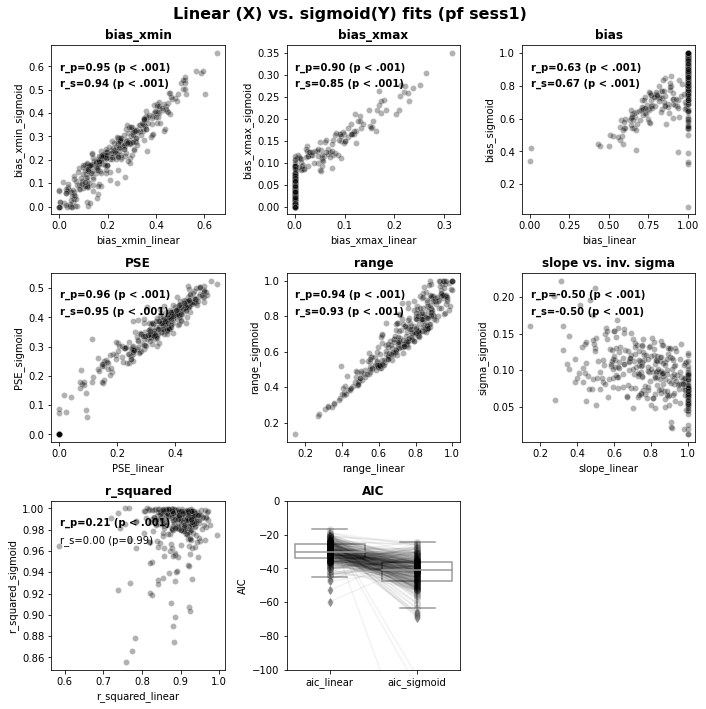

In [30]:
nrows = 3
ncols = 3
fig,axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (10,10))
for i,param in enumerate(comparisons):
    r = int(np.floor(i/ncols))
    c = i%ncols
    ax = axs[r,c]
    explore_correlations(df_both, param, ax)
    ax.set_title(param,fontweight='bold')
    if param == 'slope':
        ax.set_title ('slope vs. inv. sigma',fontweight='bold')

df_melted = df_both.melt(value_vars=['aic_linear', 'aic_sigmoid'], var_name='Model', value_name='AIC')
df_melted = df_melted.reset_index().rename(columns={'index': 'Row'})

ax = axs[2,1]
sns.boxplot(x='Model', y='AIC', data=df_melted,ax=ax, color = 'w')
ax.set_xlabel('')
for i in df_both.index:
    ax.plot(['aic_linear', 'aic_sigmoid'], [df_both.loc[i, 'aic_linear'], df_both.loc[i, 'aic_sigmoid']], marker='o', color='k',alpha = .05)
ax.set_title('AIC',fontweight='bold')
ax.set_ylim(-100,0)

ax = axs[2,2]
ax.axis('off')

plt.suptitle('Linear (X) vs. sigmoid(Y) fits (pf sess1)', fontweight='bold', fontsize=16)
plt.tight_layout()
# plt.savefig('../results/subtlety/linear_vs_sigmoid_ses1.png',dpi=300,bbox_inches='tight')

In [31]:
df_both.to_csv('../data/subtlety_data/curvefits_subt_linear_sigmoid_params_ses1.csv')

In [32]:
from scipy import stats

In [33]:
s=16 # CHANGE FONTSIZE HERE
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend

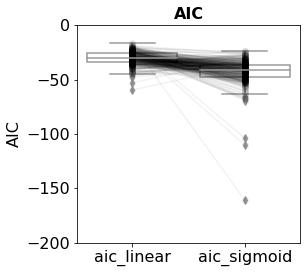

In [35]:
df_melted = df_both.melt(value_vars=['aic_linear', 'aic_sigmoid'], var_name='Model', value_name='AIC')
df_melted = df_melted.reset_index().rename(columns={'index': 'Row'})

fig,ax = plt.subplots(figsize=(4,4),nrows=1,ncols=1)
sns.boxplot(x='Model', y='AIC', data=df_melted,ax=ax, color = 'w')
ax.set_xlabel('')
for i in df_both.index:
    ax.plot(['aic_linear', 'aic_sigmoid'], [df_both.loc[i, 'aic_linear'], df_both.loc[i, 'aic_sigmoid']], marker='o', color='k',alpha = .05)
ax.set_title('AIC',fontweight='bold')
ax.set_ylim(-200,0)
plt.savefig('../results/subtlety/AIC_linear_vs_sigmoid_ses1.png')

In [36]:
stats.ttest_rel(df_both['aic_sigmoid'],df_both['aic_linear'])

Ttest_relResult(statistic=-14.228981017661258, pvalue=9.888593103459136e-36)

In [37]:
df_both['aic_sigmoid'].mean(),df_both['aic_linear'].mean(), df_both['aic_sigmoid'].std(),df_both['aic_linear'].std()

(-42.537809523990326,
 -30.300845945505408,
 12.028732070496401,
 6.167357181213923)

In [38]:
df_both['aic_diff'] = df_both['aic_sigmoid'] - df_both['aic_linear']
# len(np.where(df_both['aic_diff']>0)[0]), len(np.where(df_both['aic_diff']==0)[0]), len(np.where(df_both['aic_diff']<0)[0])
len(np.where(df_both['aic_diff']>5)[0]), len(np.where(df_both['aic_diff']==0)[0]), len(np.where(df_both['aic_diff']<-5)[0])

(25, 0, 225)

In [39]:
len(np.where(df_both['aic_diff']>10)[0]), len(np.where(df_both['aic_diff']==0)[0]), len(np.where(df_both['aic_diff']<-10)[0])

(8, 0, 169)